In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [110]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [111]:
train.drop(columns=['Cabin'], inplace=True)
test.drop(columns=['Cabin'], inplace=True)

In [112]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Embarked,0


In [113]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [114]:
train['Embarked'].fillna('S', inplace = True)

/tmp/ipython-input-114-3964132071.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna('S', inplace = True)


In [115]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [116]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

/tmp/ipython-input-116-3411113445.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Fare'].fillna(test['Fare'].mean(),inplace=True)


In [117]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [118]:
train_age = np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean() + train['Age'].std(),177)

In [119]:
test_age = np.random.randint(test['Age'].mean()-test['Age'].std(),test['Age'].mean() + test['Age'].std(),86)


In [120]:
train['Age'][train['Age'].isnull()].shape

(177,)

In [121]:
train['Age'][train['Age'].isnull()] =train_age

/tmp/ipython-input-121-2422393896.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train['Age'][train['Age'].isnull()] =train_age
/tmp/ipython-input-121-2422393896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [122]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [123]:
test['Age'][test['Age'].isnull()] =test_age


/tmp/ipython-input-123-629899486.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test['Age'][test['Age'].isnull()] =test_age
/tmp/ipython-input-123-629899486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [124]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [125]:
# EDA

In [126]:
train[train['Pclass']==3]['Survived'].value_counts()

,count
Survived,
0,372
1,119


In [127]:
train.groupby(['Pclass'])['Survived'].mean()*100

,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


In [128]:
119/(372+119)*100

24.236252545824847

In [129]:
train.groupby(['Sex'])['Survived'].mean()*100


,Survived
Sex,
female,74.203822
male,18.890815


In [130]:
train.groupby(['Embarked'])['Survived'].mean()


,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [131]:
train.groupby(['Age'])['Survived'].mean()*100


,Survived
Age,
0.42,100.0
0.67,100.0
0.75,100.0
0.83,100.0
0.92,100.0
...,...
70.00,0.0
70.50,0.0
71.00,0.0


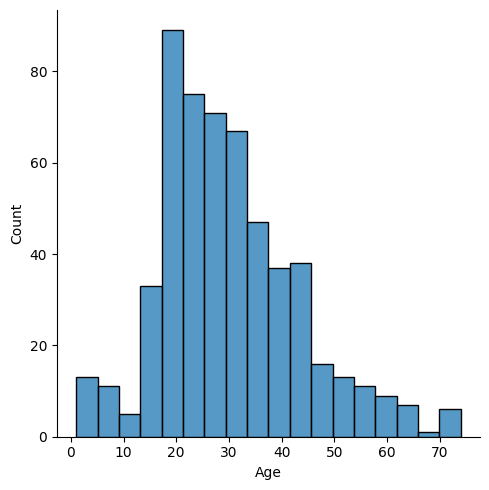

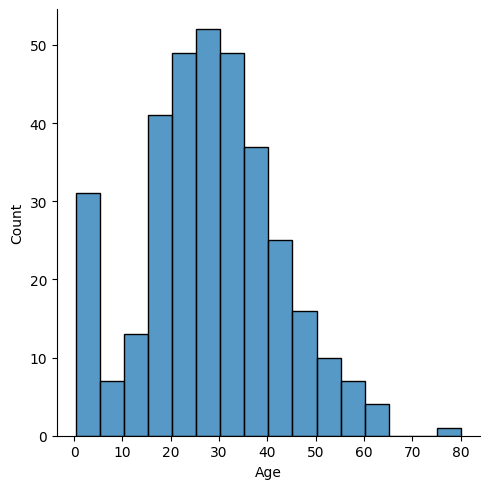

In [132]:
sns.displot(train['Age'][train['Survived']==0])
sns.displot(train['Age'][train['Survived']==1])


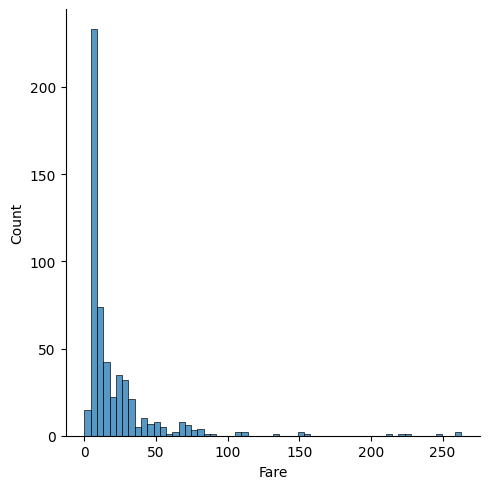

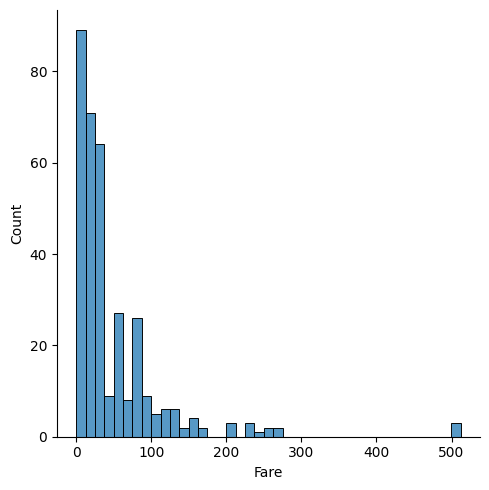

In [133]:
sns.displot(train['Fare'][train['Survived']==0])
sns.displot(train['Fare'][train['Survived']==1])


In [134]:
train.drop(columns=['Ticket'],inplace=True)
test.drop(columns=['Ticket'],inplace=True)


In [135]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [136]:
train['family'] = train['SibSp'] + train['Parch'] + 1

In [137]:
test['family'] = test['SibSp'] + test['Parch'] + 1


In [138]:
train.groupby(['family'])['Survived'].mean()*100


,Survived
family,
1,30.353818
2,55.279503
3,57.843137
4,72.413793
5,20.000000
6,13.636364
7,33.333333
8,0.000000
11,0.000000


In [139]:
def cal(number):
    if number == 1:
        return "Alone"
    elif number > 1 and number < 5:
        return "Medium"
    else:
        return "Large"



In [140]:
train['family_size']=train['family'].apply(cal)

In [141]:
test['family_size']=test['family'].apply(cal)


In [142]:
train.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,family,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,Medium


In [143]:
test.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,family,family_size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,Alone
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2,Medium
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1,Alone
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1,Alone


In [144]:
train.drop(columns=['SibSp','Parch','family'],inplace = True)

In [145]:
test.drop(columns=['SibSp','Parch','family'],inplace = True)


In [146]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
Fare,0
Embarked,0
family_size,0


In [147]:
passengerId=test['PassengerId'].values

In [148]:
train.drop(columns=['Name','PassengerId'],inplace=True)
test.drop(columns=['Name','PassengerId'],inplace=True)


In [149]:
train.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
Fare,0
Embarked,0
family_size,0


In [150]:
print(train['Embarked'])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object


In [151]:
train.head(20)

,Survived,Pclass,Sex,Age,Fare,Embarked,family_size
0,0,3,male,22.0,7.2500,S,Medium
1,1,1,female,38.0,71.2833,C,Medium
2,1,3,female,26.0,7.9250,S,Alone
3,1,1,female,35.0,53.1000,S,Medium
4,0,3,male,35.0,8.0500,S,Alone
5,0,3,male,26.0,8.4583,Q,Alone
6,0,1,male,54.0,51.8625,S,Alone
7,0,3,male,2.0,21.0750,S,Large
8,1,3,female,27.0,11.1333,S,Medium
9,1,2,female,14.0,30.0708,C,Medium


In [152]:
train = pd.get_dummies(train,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)

In [153]:
train.shape

(891, 10)

In [154]:
test = pd.get_dummies(test,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)


In [155]:
test.shape

(418, 9)

In [156]:
X=train.iloc[:,1:].values
y=train.iloc[:,0].values

In [157]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [158]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()

In [159]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [160]:
y_pred=classifier.predict(X_test)

In [161]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.770949720670391

In [162]:
Xf=test.iloc[:,:].values

In [163]:
y_final=classifier.predict(Xf)

In [164]:
y_final.shape

(418,)

In [165]:
final=pd.DataFrame()

In [166]:
final

""


In [167]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Empty DataFrame


In [168]:
final.columns

RangeIndex(start=0, stop=0, step=1)

In [169]:
final['passengerId']=passengerId
final['survived']=y_final

In [170]:
final

,passengerId,survived
0,892,0
1,893,1
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [171]:
final.to_csv('submission.csv',index=False)

In [172]:
from google.colab import files
files.download('submission.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>